In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison

dotenv.load_dotenv(dotenv.find_dotenv())

True

/home/csverst/Github/CtDBenchmark/


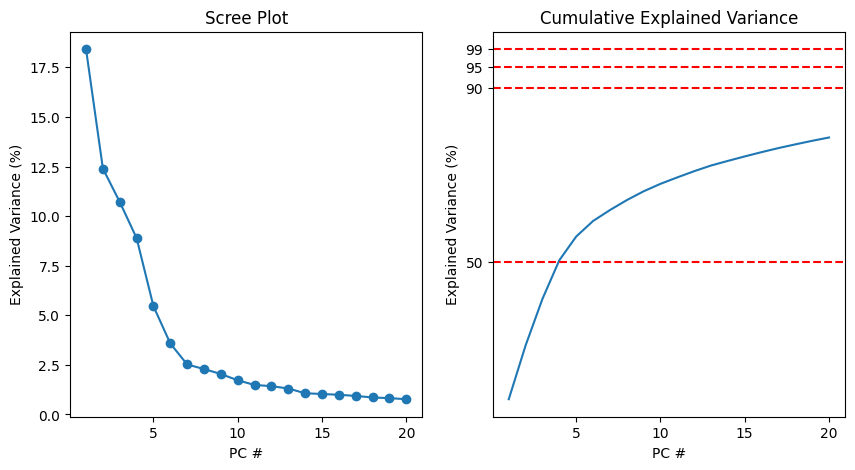

In [2]:

HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240411_MultiTask_GRU_L2Lats/max_epochs=500 latent_l2_wt=1e-07 latent_size=128 seed=0/'
# pathGRU = pathTT + '20240412_Fig1_MultiTask_GRU_DT_Seeds/'
# pathVanilla = pathTT + '20240401_VanillaRNN_DT_Final/'
# pathNODE = pathTT + '20240401_NODE_DT_Final/'
# pathLFADS = pathTT + '20240402_NBFF_LFADS_DT_WDecay_Sweep2/gen_model=GRU_RNN prefix=20240328_NBFF_GRU_Final seed=0 max_epochs=1500 weight_decay=1e-05/'

an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)
an_TT.plot_scree(max_pcs= 20)

# an_GRU = Analysis_DT(run_name = "GRU", filepath = pathGRU, model_type = "SAE")
# an_Vanilla = Analysis_DT(run_name = "Vanilla", filepath = pathVanilla, model_type = "SAE")
# an_NODE = Analysis_DT(run_name = "NODE", filepath = pathNODE, model_type = "SAE")
# an_LFADS = Analysis_DT(run_name = "LFADS", filepath = pathLFADS, model_type = "LFADS")

path_GRU_Sweep = pathTT + "20240412_Fig1_MultiTask_GRU_DT_Seeds/"
subfolders_GRU = [f.path for f in os.scandir(path_GRU_Sweep) if f.is_dir()]

path_Vanilla_Sweep = pathTT + "20240416_Fig1_MultiTask_Vanilla_DT/"
subfolders_Vanilla = [f.path for f in os.scandir(path_Vanilla_Sweep) if f.is_dir()]

path_NODE_Sweep = pathTT + "20240412_Fig1_MultiTask_NODE_DT_Seeds/"
subfolders_NODE = [f.path for f in os.scandir(path_NODE_Sweep) if f.is_dir()]

path_LFADS_Sweep = pathTT + "20240416_Fig1_MultiTask_LFADS_DT/"
subfolders_LFADS = [f.path for f in os.scandir(path_LFADS_Sweep) if f.is_dir()]

In [3]:
comparison = Comparison(comparison_tag="Figure1MultiTask")
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")
# comparison.load_analysis(an_GRU, group = "GRU")
# comparison.load_analysis(an_Vanilla, group = "Vanilla")
# comparison.load_analysis(an_NODE, group = "NODE")
# comparison.load_analysis(an_LFADS, group = "LFADS")

for subfolder in subfolders_GRU:
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "GRU")

for subfolder in subfolders_Vanilla:
    
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "Vanilla", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "Vanilla")

for subfolder in subfolders_NODE:
    
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "NODE", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "NODE")

for subfolder in subfolders_LFADS:
        
        subfolder = subfolder + "/"
        analysis_temp = Analysis_DT(run_name = "LFADS", filepath = subfolder, model_type = "LFADS")
        comparison.load_analysis(analysis_temp, group = "LFADS")

comparison.regroup()

Working on 1 of 19
Working on 2 of 19
Working on 3 of 19
Working on 4 of 19
Working on 5 of 19
Working on 6 of 19
Working on 7 of 19
Working on 8 of 19
Working on 9 of 19
Working on 10 of 19
Working on 11 of 19
Working on 12 of 19
Working on 13 of 19
Working on 14 of 19
Working on 15 of 19
Working on 16 of 19
Working on 17 of 19
Working on 18 of 19
Working on 19 of 19


array([[-0.63472704,  0.53999376],
       [-0.27930733,  0.57413179],
       [-0.11767239,  0.5979673 ],
       [-0.56455937,  0.54384127],
       [-0.58171803,  0.55898766],
       [-0.16070386,  0.62922551],
       [-0.16164968,  0.62986657],
       [-0.30850038,  0.59804357],
       [-0.30741517,  0.6190288 ],
       [-0.05821261,  0.62839494],
       [ 0.        ,  0.        ],
       [-0.06127058,  0.39421728],
       [-0.12181594,  0.28266563],
       [ 0.        ,  0.        ],
       [-0.26859487,  0.465198  ],
       [-0.0795762 ,  0.36520199],
       [-0.41480935,  0.43086058],
       [-0.11473803,  0.44177751],
       [-0.23420802,  0.4813752 ]])

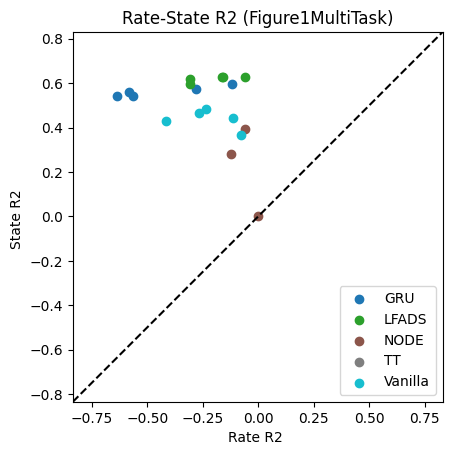

In [4]:
# comparison.compare_performance()
# comparison.compare_CCA(num_components=5)

comparison.compare_state_rate_r2(phase = 'val')


In [5]:

import torch
phase= "val"
model_num = 9
rates, latents = comparison.analyses[model_num].get_model_outputs(phase=phase)
true_rates = comparison.analyses[model_num].get_true_rates(phase=phase)

rates_stack = []
latents_stack = []
true_rates_stack = []

trial_lens = analysis_temp.get_trial_lens(phase = phase)
# Stack the latents to the different trial lengths
for j in range(latents.shape[0]):
    latents_stack.append(
        latents[j, : int(trial_lens[j]), :]
    )
    rates_stack.append(
        rates[j, : int(trial_lens[j]), :]
    )
    true_rates_stack.append(
        true_rates[j, : int(trial_lens[j]), :]
    )
rates = torch.vstack(rates_stack)
latents = torch.vstack(latents_stack)
true_rates = torch.vstack(true_rates_stack)



(20387, 50)
(20387, 50)
[ 0.07737539  0.33706557  0.39387435  0.05745444  0.68499931 -0.13003774
 -0.03915264  0.05841494 -1.125038    0.18968356 -0.43244788 -1.84821815
 -0.58178707  0.03105984  0.16565452 -0.18416862 -0.02393506 -0.0107265
  0.55928641  0.17106429  0.02967003  0.16299759  0.08845915  0.47440051
 -0.05698144  0.03728341 -0.66213788  0.31324466 -0.05328034 -0.33149326
 -0.00935244 -0.11584631 -0.07116177  0.17426467  0.35386871 -1.34546555
 -0.11115716 -0.0680343   0.20591482  0.03439721  0.06380238  0.10757647
  0.56111769 -0.0665956  -1.42323883  0.03831242  0.1147111   0.46967704
 -0.09802894 -0.12399273]
(50,)


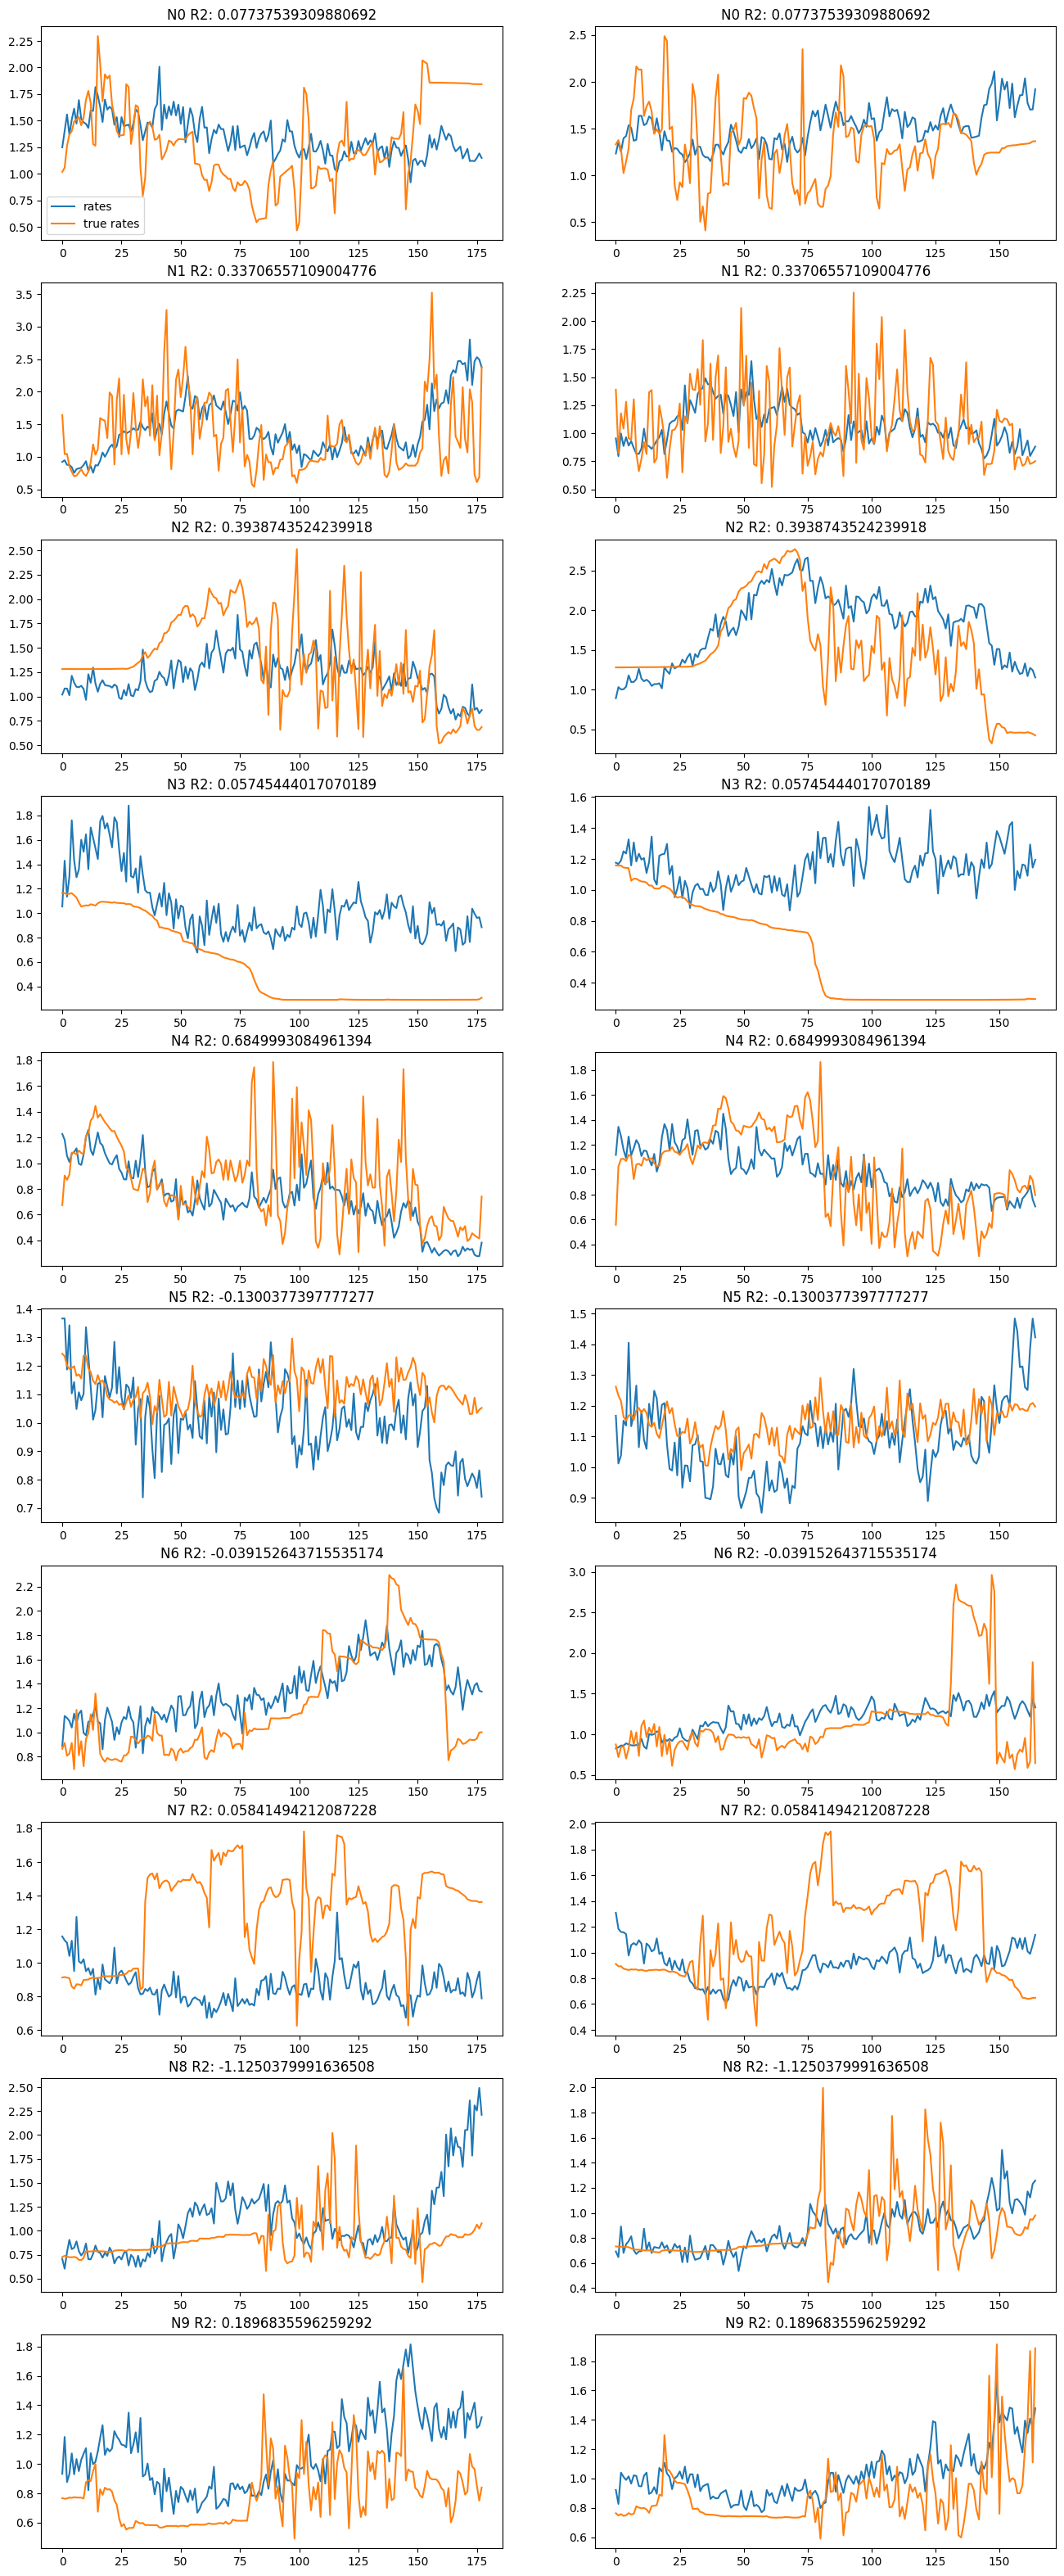

In [6]:
from sklearn.metrics import r2_score
tr_np = true_rates.detach().cpu().numpy()
rates_np = rates.detach().cpu().numpy()

print(tr_np.shape)
print(rates_np.shape)

r2 = r2_score(tr_np, rates_np, multioutput='raw_values')
print(r2)
print(r2.shape)

neurons_to_plot= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
trials_to_plot = [0,1]
fig = plt.figure(figsize=( 8*len(trials_to_plot),4*len(neurons_to_plot),))
axes = fig.subplots(len(neurons_to_plot), len(trials_to_plot))
for i in range(len(neurons_to_plot)):
    for j in range(len(trials_to_plot)):
        
        ax = axes[i,j]
        
        rates_plot = rates_stack[trials_to_plot[j]][:, neurons_to_plot[i]].detach().numpy()
        true_rates_plot = true_rates_stack[trials_to_plot[j]][:, neurons_to_plot[i]].detach().numpy()
        if i ==0 and j == 0:
            ax.plot(rates_plot, label = "rates")
            ax.plot(true_rates_plot, label = "true rates")
            ax.legend()
        else:
            ax.plot(rates_plot, label = "rates")
            ax.plot(true_rates_plot, label = "true rates")
        ax.set_title(f"N{neurons_to_plot[i]} R2: {r2[neurons_to_plot[i]]}")
        




In [7]:

print(r2)

[ 0.07737539  0.33706557  0.39387435  0.05745444  0.68499931 -0.13003774
 -0.03915264  0.05841494 -1.125038    0.18968356 -0.43244788 -1.84821815
 -0.58178707  0.03105984  0.16565452 -0.18416862 -0.02393506 -0.0107265
  0.55928641  0.17106429  0.02967003  0.16299759  0.08845915  0.47440051
 -0.05698144  0.03728341 -0.66213788  0.31324466 -0.05328034 -0.33149326
 -0.00935244 -0.11584631 -0.07116177  0.17426467  0.35386871 -1.34546555
 -0.11115716 -0.0680343   0.20591482  0.03439721  0.06380238  0.10757647
  0.56111769 -0.0665956  -1.42323883  0.03831242  0.1147111   0.46967704
 -0.09802894 -0.12399273]


In [8]:
# sims = comparison.compare_dynamics_DSA()


In [9]:
# Take upper triangle of sims
# sims = np.triu(sims, k=0)
# sims = sims.flatten()
# self_sim = sims[0]
# sims = sims[1:]
# fig = plt.figure()
# plt.bar(range(len(sims)), sims)
# plt.title("Dynamical Similarity")
# plt.xlabel("Model")
# plt.ylabel("Similarity")
# plt.xticks(range(len(sims)), ["GRU", "Vanilla", "NODE"])    

comparison.compare_to_reference_affine